In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from lightgbm import LGBMClassifier
from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.metrics import mutual_info_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier


In [2]:
datos = pd.read_csv("./data/credit_npo.csv")
datos

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
datos.dropna(inplace = True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [5]:
objetivo = "SeriousDlqin2yrs"

In [6]:
train_set, test_set = train_test_split(datos, test_size = 0.2, random_state= 42)

### Detalles e Instrucciones

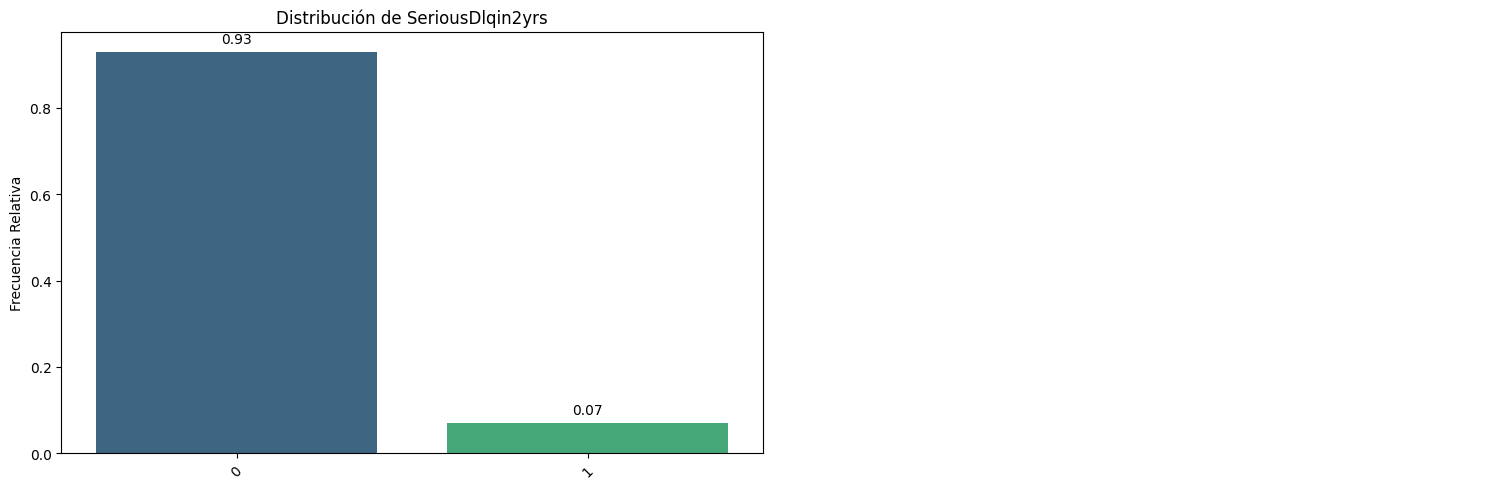

In [7]:
bt.pinta_distribucion_categoricas(train_set, [objetivo], True, True)

In [8]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,9452.0,0.070144,0.255403,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,9452.0,0.335207,0.362233,0.0,0.034869,0.179211,0.587533,6.0
age,9452.0,51.491536,14.499298,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,9452.0,0.343314,2.930489,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,9452.0,0.486047,2.505031,0.0,0.146204,0.297564,0.477876,96.0
MonthlyIncome,9452.0,6868.428058,12580.543336,0.0,3466.000000,5441.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,9452.0,8.794647,5.139555,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,9452.0,0.180279,2.889984,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,9452.0,1.064325,1.148156,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,9452.0,0.152772,2.870119,0.0,0.000000,0.000000,0.000000,98.0


(10, 2)


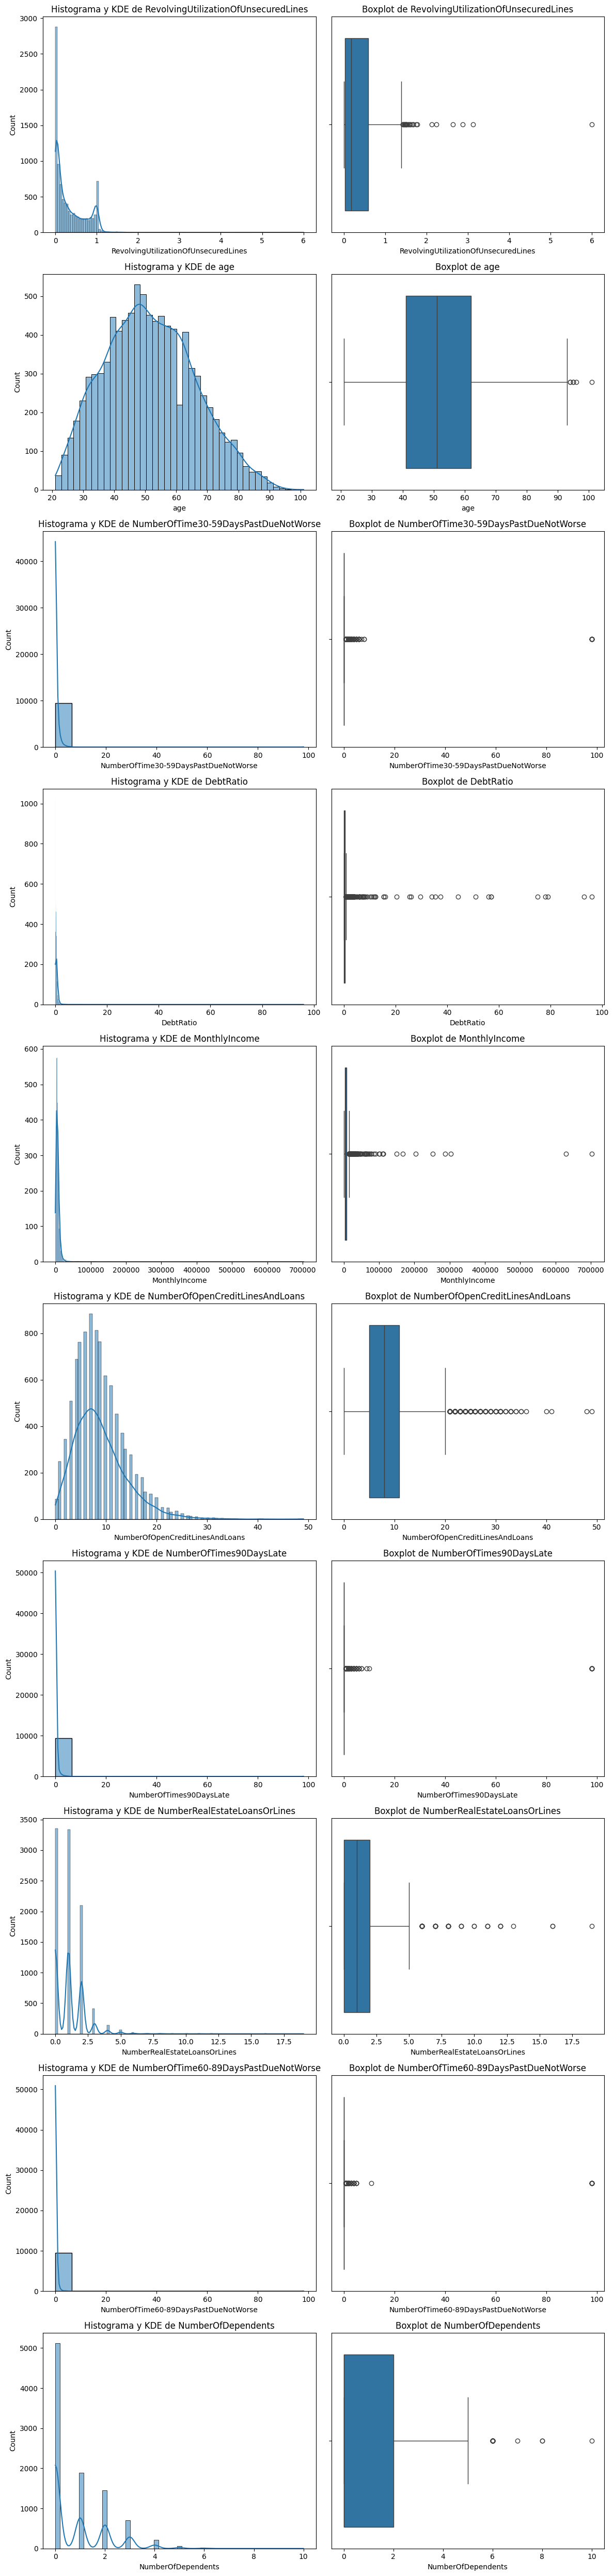

In [9]:
bt.plot_combined_graphs(train_set, [col for col in train_set.columns if col != objetivo])

In [10]:
features_num = ["RevolvingUtilizationOfUnsecuredLines",
                "age",
                "DebtRatio",
                "MonthlyIncome",
                "NumberOfOpenCreditLinesAndLoans",
                "NumberOfDependents"]

3. Train y Test


In [11]:
train_set["NumberOfDependents"].value_counts(True) * 100

NumberOfDependents
0.0     54.221329
1.0     19.942869
2.0     15.308929
3.0      7.490478
4.0      2.211172
5.0      0.581887
6.0      0.201016
8.0      0.021160
7.0      0.010580
10.0     0.010580
Name: proportion, dtype: float64

### 4. MiniEDA ###

In [12]:
train_set["NumberRealEstateLoansOrLines"].value_counts(True) * 100

NumberRealEstateLoansOrLines
0     35.505713
1     35.272958
2     22.164621
3      4.369446
4      1.449429
5      0.708845
6      0.201016
8      0.084638
7      0.084638
11     0.031739
12     0.031739
9      0.031739
10     0.021160
16     0.021160
13     0.010580
19     0.010580
Name: proportion, dtype: float64

In [13]:
features_num.append("NumberRealEstateLoansOrLines")

In [14]:
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents',
 'NumberRealEstateLoansOrLines']

In [15]:
train_set["NumberOfTime30-59DaysPastDueNotWorse"].value_counts(True)

NumberOfTime30-59DaysPastDueNotWorse
0     0.831147
1     0.113521
2     0.033644
3     0.010897
4     0.005607
5     0.002116
6     0.001904
98    0.000846
8     0.000212
7     0.000106
Name: proportion, dtype: float64

In [16]:
n_corto = "NumberOfTime30-59DaysPastDueNotWorse"
train_set[train_set[objetivo] == 0][n_corto].value_counts(True)

NumberOfTime30-59DaysPastDueNotWorse
0     0.855956
1     0.103083
2     0.026852
3     0.007851
4     0.003413
5     0.001138
6     0.001024
98    0.000341
8     0.000228
7     0.000114
Name: proportion, dtype: float64

In [17]:
n_corto = "NumberOfTime30-59DaysPastDueNotWorse"
train_set[train_set[objetivo] == 1][n_corto].value_counts(True)

NumberOfTime30-59DaysPastDueNotWorse
0     0.502262
1     0.251885
2     0.123680
3     0.051282
4     0.034691
5     0.015083
6     0.013575
98    0.007541
Name: proportion, dtype: float64

In [18]:

n_corto = "NumberOfTime30-59DaysPastDueNotWorse"


labels = [0,1,2]

train_set["N30-59"] = pd.cut(train_set[n_corto], bins = [-1,0,1,10000], labels = labels, right= True).astype(int) # - - right a True para incluir los valores "a la derecha" en el bin (es decir -1,0 incluye a todos los valores >-1 y <= 0)
test_set["N30-59"] = pd.cut(test_set[n_corto], bins = [-1,0,1,10000], labels = labels, right= True).astype(int) 
train_set["N30-59"].value_counts(True)


N30-59
0    0.831147
1    0.113521
2    0.055332
Name: proportion, dtype: float64

In [19]:
train_set[train_set[objetivo] == 1]["N30-59"].value_counts(True)

N30-59
0    0.502262
1    0.251885
2    0.245852
Name: proportion, dtype: float64

In [20]:
train_set["NumberOfTime60-89DaysPastDueNotWorse"].value_counts(True)

NumberOfTime60-89DaysPastDueNotWorse
0     0.947207
1     0.040521
2     0.008041
3     0.001481
4     0.001375
98    0.000846
5     0.000423
11    0.000106
Name: proportion, dtype: float64

In [21]:
train_set["NumberOfTime60-89DaysPastDueNotWorse"] != 0

11145    False
2012     False
5428     False
12130    False
36       False
         ...  
11966    False
5512     False
5719     False
922      False
7727     False
Name: NumberOfTime60-89DaysPastDueNotWorse, Length: 9452, dtype: bool

In [22]:
(train_set["NumberOfTime60-89DaysPastDueNotWorse"] != 0).astype(int)

11145    0
2012     0
5428     0
12130    0
36       0
        ..
11966    0
5512     0
5719     0
922      0
7727     0
Name: NumberOfTime60-89DaysPastDueNotWorse, Length: 9452, dtype: int64

In [23]:
train_set["N60-89"] = (train_set["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)
test_set["N60-89"] = (test_set["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)
train_set["N60-89"].value_counts(True)

N60-89
0    0.947207
1    0.052793
Name: proportion, dtype: float64

In [24]:
train_set[train_set[objetivo] == 1]["N60-89"].value_counts(True)

N60-89
0    0.746606
1    0.253394
Name: proportion, dtype: float64

In [25]:
train_set[train_set[objetivo] == 0]["N60-89"].value_counts(True)

N60-89
0    0.962339
1    0.037661
Name: proportion, dtype: float64

In [26]:
train_set["NumberOfTimes90DaysLate"].value_counts(True)

NumberOfTimes90DaysLate
0     0.943610
1     0.033115
2     0.012590
3     0.004655
4     0.002751
5     0.001481
98    0.000846
6     0.000529
7     0.000212
9     0.000106
10    0.000106
Name: proportion, dtype: float64

In [27]:
train_set["N90"] = (train_set["NumberOfTimes90DaysLate"] > 0).astype(int)
test_set["N90"] = (test_set["NumberOfTimes90DaysLate"] > 0).astype(int)
train_set["N90"].value_counts(True)

N90
0    0.94361
1    0.05639
Name: proportion, dtype: float64

In [28]:
train_set[train_set[objetivo] == 1]["N90"].value_counts(True)

N90
0    0.642534
1    0.357466
Name: proportion, dtype: float64

In [29]:
train_set[train_set[objetivo] == 0]["N90"].value_counts(True)

N90
0    0.966322
1    0.033678
Name: proportion, dtype: float64

In [30]:
features_cat = ["N30-59","N60-89","N90"]
features_cat


['N30-59', 'N60-89', 'N90']

In [31]:
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents',
 'NumberRealEstateLoansOrLines']

In [32]:
objetivo

'SeriousDlqin2yrs'

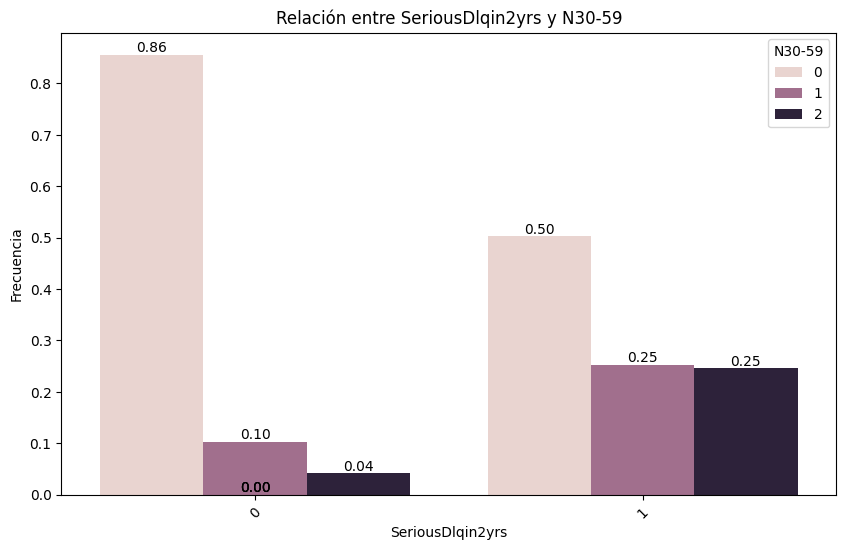

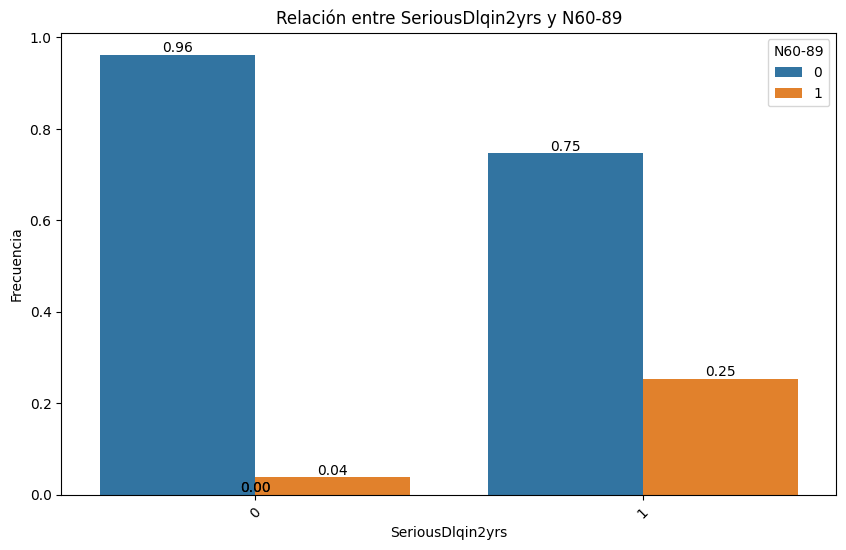

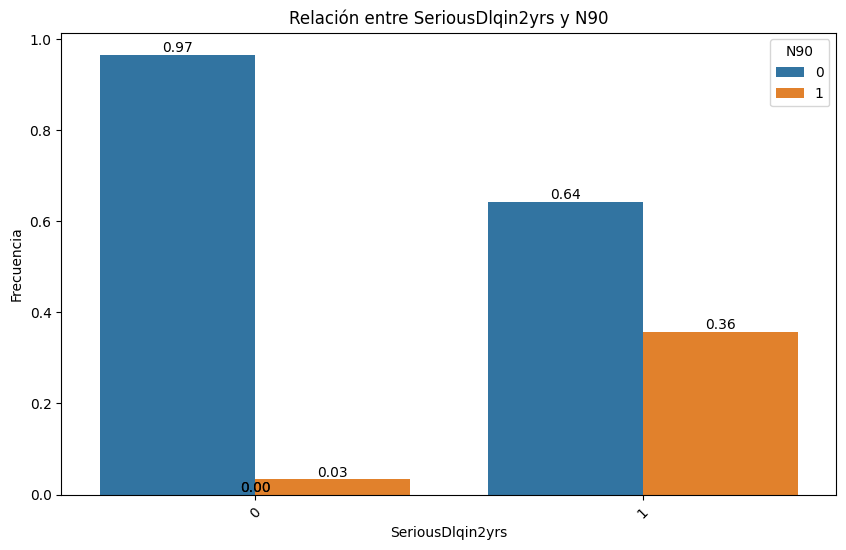

In [33]:
for col in features_cat:
    bt.plot_categorical_relationship_fin(train_set, objetivo, col, True, True)

In [34]:
features_visual = features_cat.copy()

In [35]:
len(features_num + [objetivo])

8

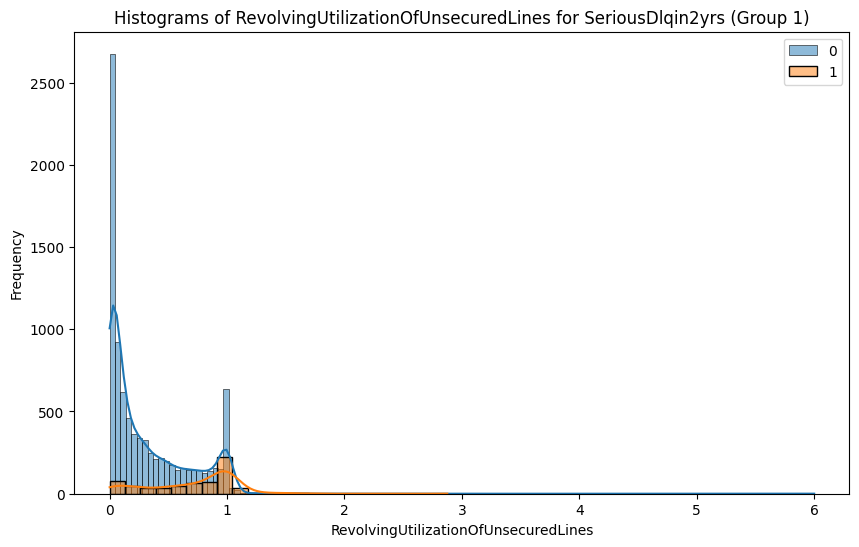

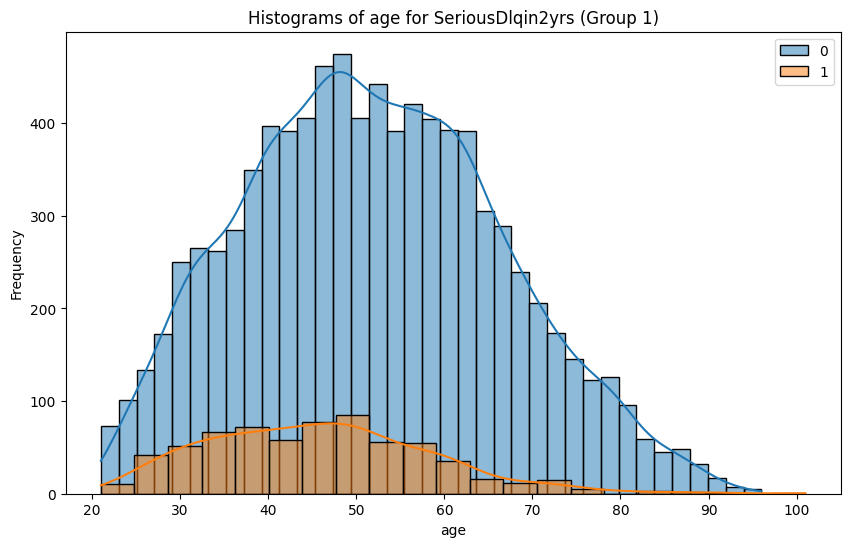

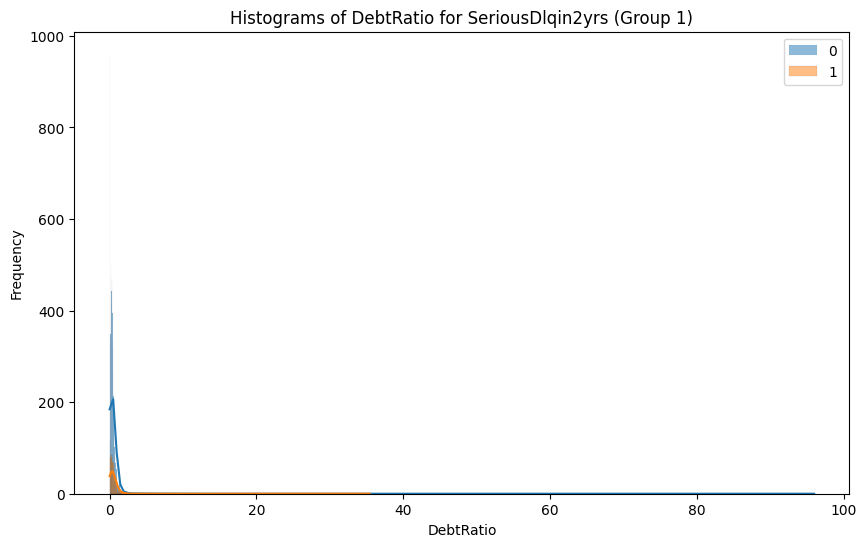

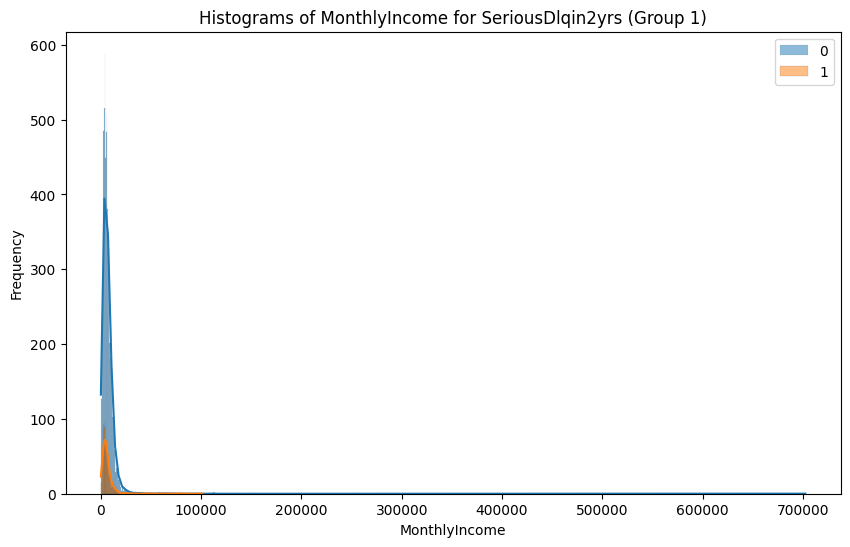

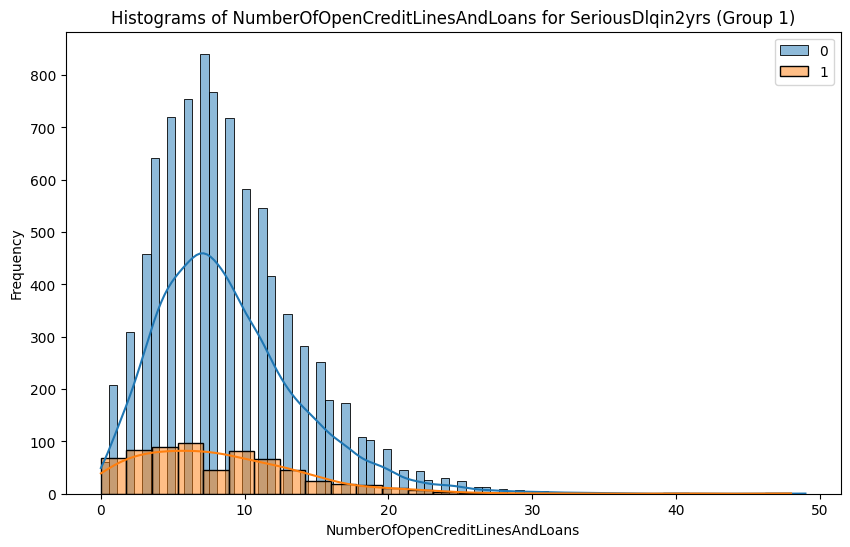

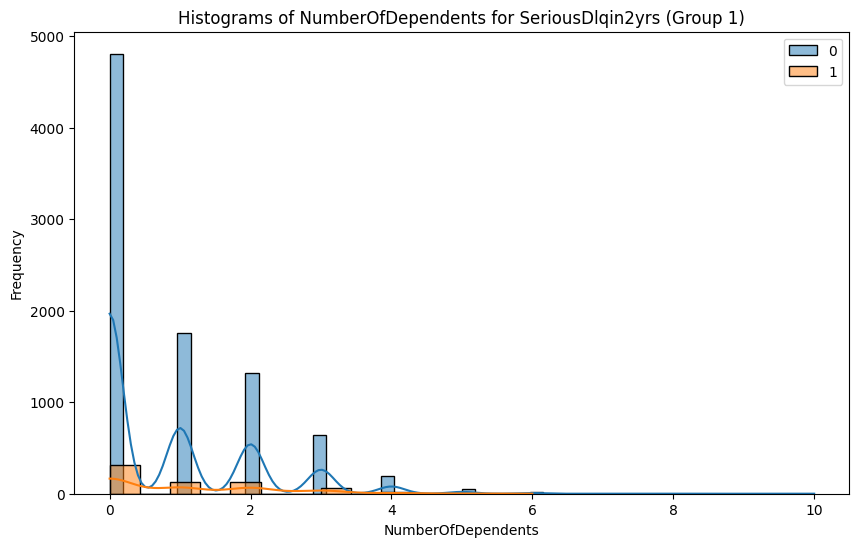

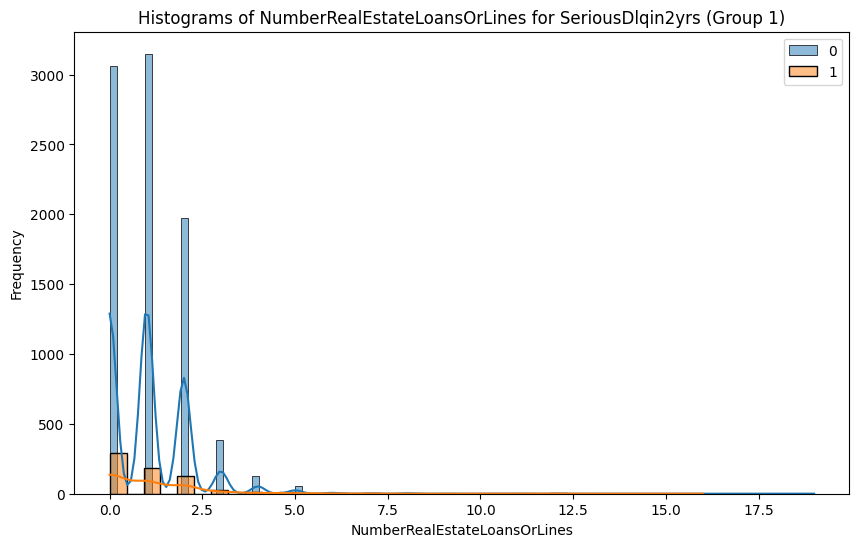

In [37]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= objetivo, num_col= col, group_size= 2)

4.3 **Análisis visual con estadísticos matemáticos**

In [38]:
features_visual.append("RevolvingUtilizationOfUnsecuredLines")

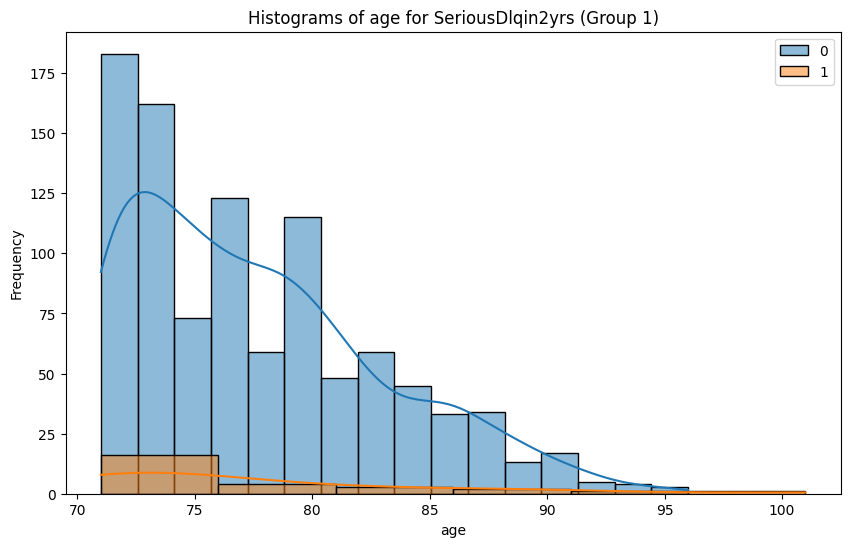

In [39]:
edad_cool = (train_set["age"] > 70)
bt.plot_grouped_histograms(train_set[edad_cool], cat_col = objetivo, num_col= "age", group_size= 2)

In [40]:
features_visual.append("age")

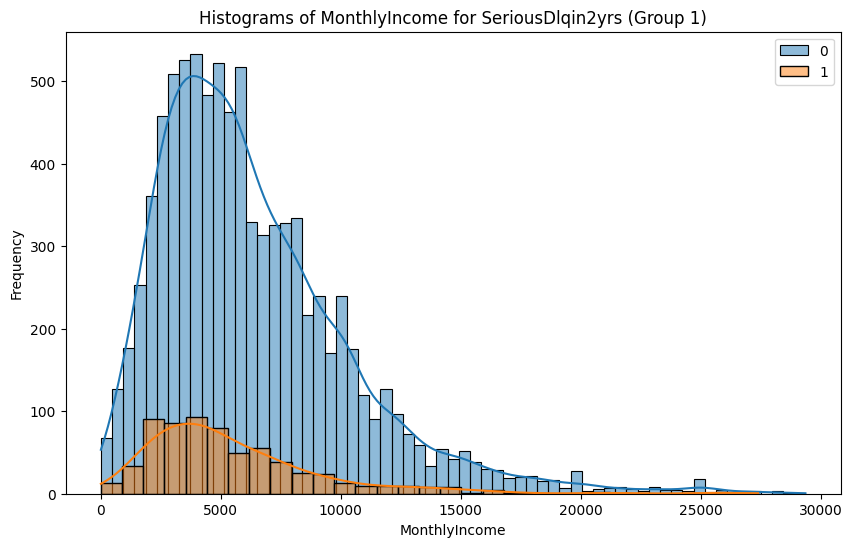

In [41]:
sin_monthlyincome_outliers = train_set["MonthlyIncome"] < 30000 # - - eL valor se escoge mirando el diagrama de caja, y no hay una regla fija, haz un diagrama de caja y obserfva que a partir de 20000 ya hay muchos outliers, escoger 30000 o 20000 es "indiferente" de primeras
bt.plot_grouped_histograms(train_set[sin_monthlyincome_outliers], cat_col= objetivo, num_col= "MonthlyIncome", group_size= 2)

In [42]:
cat_col = objetivo
num_col = "MonthlyIncome"

grupo_a = train_set.loc[train_set[cat_col] == 0][num_col]
grupo_b = train_set.loc[train_set[cat_col] == 1][num_col]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 3309844.0
Valor p: 4.937655211085432e-09


In [43]:
# - - p_valor <<<< 0.05

In [44]:
features_visual.append("MonthlyIncome")

In [45]:
train_set["DebtRatio"].describe()

count    9452.000000
mean        0.486047
std         2.505031
min         0.000000
25%         0.146204
50%         0.297564
75%         0.477876
max        96.000000
Name: DebtRatio, dtype: float64

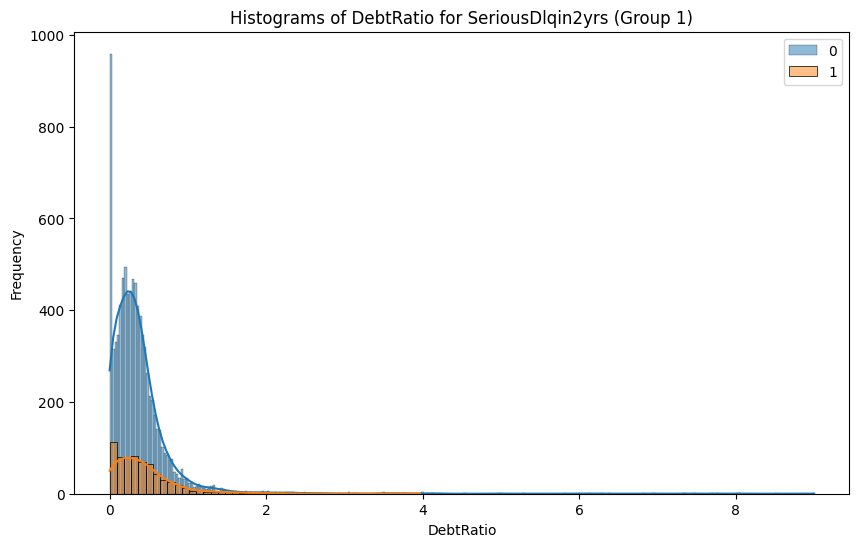

In [46]:
sin_debtratio_outliers = train_set["DebtRatio"] < 10
bt.plot_grouped_histograms(train_set[sin_debtratio_outliers], cat_col= objetivo, num_col= "DebtRatio", group_size= 2)

In [47]:
cat_col = objetivo
num_col = "DebtRatio"

grupo_a = train_set.loc[train_set[cat_col] == 0][num_col]
grupo_b = train_set.loc[train_set[cat_col] == 1][num_col]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 2623985.5
Valor p: 1.920288228898668e-05


In [48]:
features_visual.append("DebtRatio")

In [49]:
features_visual

['N30-59',
 'N60-89',
 'N90',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'DebtRatio']

In [50]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [51]:
for umbral_varianza in np.arange(0,1,0.1):
    print(f"Para umbral = {umbral_varianza}")
    var_selector = VarianceThreshold(umbral_varianza)
    var_selector.fit(train_set[features_visual])
    print("Lista seleccionada por selector de Varianza", var_selector.get_feature_names_out())

Para umbral = 0.0
Lista seleccionada por selector de Varianza ['N30-59' 'N60-89' 'N90' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.1
Lista seleccionada por selector de Varianza ['N30-59' 'RevolvingUtilizationOfUnsecuredLines' 'age' 'MonthlyIncome'
 'DebtRatio']
Para umbral = 0.2
Lista seleccionada por selector de Varianza ['N30-59' 'age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.30000000000000004
Lista seleccionada por selector de Varianza ['age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.4
Lista seleccionada por selector de Varianza ['age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.5
Lista seleccionada por selector de Varianza ['age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.6000000000000001
Lista seleccionada por selector de Varianza ['age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.7000000000000001
Lista seleccionada por selector de Varianza ['age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.8
Lista seleccionada por selecto

*Tengo mis dudas, aunque el pico en 0 de pagadores me invita a quedarmela, haré también un test:*

In [52]:
features_visual

['N30-59',
 'N60-89',
 'N90',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'DebtRatio']

In [53]:
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents',
 'NumberRealEstateLoansOrLines']

In [54]:
X_entrena = train_set[features_num]
y_entrena = train_set[objetivo]

selector_num = SelectKBest(f_classif, k=4)
x_data_kbest = selector_num.fit_transform(X_entrena, y_entrena)
X_entrena_kbest = pd.DataFrame(x_data_kbest, columns = selector_num.get_feature_names_out())
X_entrena_kbest

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfOpenCreditLinesAndLoans,NumberOfDependents
0,0.391240,68.0,13.0,0.0
1,0.906540,59.0,7.0,1.0
2,0.933223,52.0,3.0,3.0
3,0.857859,50.0,9.0,0.0
4,0.000000,61.0,5.0,1.0
...,...,...,...,...
9447,0.397822,53.0,14.0,0.0
9448,0.015171,76.0,4.0,0.0
9449,0.988201,62.0,4.0,0.0
9450,0.122072,41.0,9.0,1.0


In [55]:
features_filter = list(selector_num.get_feature_names_out())
features_filter

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents']

In [56]:
features_cat

['N30-59', 'N60-89', 'N90']

In [57]:
from sklearn.feature_selection import mutual_info_classif

X_entrena = train_set[features_cat]
y_entrena = train_set[objetivo]

selector_cat = SelectKBest(mutual_info_classif, k=3)
x_data_kbest = selector_cat.fit_transform(X_entrena, y_entrena)
X_entrena_kbest = pd.DataFrame(x_data_kbest, columns = selector_cat.get_feature_names_out())
X_entrena_kbest

,N30-59,N60-89,N90
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,0
...,...,...,...
9447,0,0,0
9448,0,0,0
9449,0,0,0
9450,0,0,0


4.4 **Selección por filtrado, Análisis ANOVA y Mutual Information**

In [58]:
features_filter += features_cat

In [59]:
mutual_info_classif(X_entrena, y_entrena, random_state=42)

array([0.02514947, 0.01668426, 0.03397409])

In [60]:
# - - Información Mutua en bits

mutual_info_classif(X_entrena, y_entrena, random_state=42) / np.log(2)

array([0.03628302, 0.02407031, 0.04901425])

In [61]:
features_filter

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents',
 'N30-59',
 'N60-89',
 'N90']

In [62]:
features = features_num + features_cat

rf_selector = RandomForestClassifier(random_state= 42, class_weight= "balanced") # - -

selector_modelo = SelectFromModel(estimator = rf_selector, threshold="median") # - - Nos quedamos con la mitad

selector_modelo.fit(train_set[features], train_set[objetivo]) # - - X_entrena e y_entrena en los argumentos
features_modelo = list(selector_modelo.get_feature_names_out())
features_modelo

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'N30-59']

In [63]:
rf_check = RandomForestClassifier(random_state= 42, class_weight= "balanced")

rf_check.fit(train_set[features], train_set[objetivo])

datos_importance= pd.DataFrame(rf_check.feature_importances_, columns = ["importance"], index = features).sort_values("importance",ascending = False)
datos_importance

,importance
RevolvingUtilizationOfUnsecuredLines,0.276869
DebtRatio,0.131723
MonthlyIncome,0.118579
age,0.114854
N30-59,0.084913
N90,0.083703
NumberOfOpenCreditLinesAndLoans,0.082429
NumberRealEstateLoansOrLines,0.035758
NumberOfDependents,0.035637
N60-89,0.035536


In [64]:
datos_importance.importance.median()

np.float64(0.08430782852192972)

In [65]:
datos_importance[datos_importance.importance > datos_importance.importance.median()]

,importance
RevolvingUtilizationOfUnsecuredLines,0.276869
DebtRatio,0.131723
MonthlyIncome,0.118579
age,0.114854
N30-59,0.084913


In [66]:
rf_RFE = RandomForestClassifier(random_state= 42, class_weight= "balanced")

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 
          step = 1)

rfe.fit(train_set[features], train_set[objetivo])

RFE(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    n_features_to_select=6)

4.5 **Selección por modelo**

In [67]:
features_RFE = list(rfe.get_feature_names_out())
features_RFE

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'N30-59']

In [68]:
train_set[features].columns.tolist()

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents',
 'NumberRealEstateLoansOrLines',
 'N30-59',
 'N60-89',
 'N90']

In [69]:
40 + 36 + 32 + 28 + 24

160

In [70]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(class_weight= "balanced", random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy", # - - o en regresión p.ej. "neg_root_mean_squared_error"
                                        n_jobs = -1)


sfs_forward.fit(train_set[features], train_set[objetivo])

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(class_weight='balanced',
                                                           random_state=42),
                          n_features_to_select=5, n_jobs=-1,
                          scoring='balanced_accuracy')

4.6 **RFE**

In [71]:
features_SFS = list(sfs_forward.get_feature_names_out())
features_SFS

['NumberOfDependents',
 'NumberRealEstateLoansOrLines',
 'N30-59',
 'N60-89',
 'N90']

In [72]:
lista_total = features_visual + features_filter + features_modelo + features_RFE + features_SFS
votaciones = Counter(lista_total)
votaciones

Counter({'N30-59': 5,
         'RevolvingUtilizationOfUnsecuredLines': 4,
         'age': 4,
         'N60-89': 3,
         'N90': 3,
         'MonthlyIncome': 3,
         'DebtRatio': 3,
         'NumberOfOpenCreditLinesAndLoans': 2,
         'NumberOfDependents': 2,
         'NumberRealEstateLoansOrLines': 1})

4.7 **Selección Secuencial (SFS)**

In [73]:
escrutinio = pd.DataFrame(votaciones.values(), columns = ["Votos"], index = votaciones.keys()).sort_values("Votos", ascending = False)
escrutinio


,Votos
N30-59,5
RevolvingUtilizationOfUnsecuredLines,4
age,4
N60-89,3
N90,3
MonthlyIncome,3
DebtRatio,3
NumberOfOpenCreditLinesAndLoans,2
NumberOfDependents,2
NumberRealEstateLoansOrLines,1


In [74]:
features_hard_voting = escrutinio["Votos"].nlargest(6).index.to_list()
features_hard_voting

['N30-59',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'N60-89',
 'N90',
 'MonthlyIncome']

In [75]:
nombres = [f"Seleccion {nombre}" for nombre in ["visual", "filter", "modelo", "rfe", "sfs", "voting"]]
model_names = ["Random Forest","XGBoost", "LightGBM"]

rf_clf = RandomForestClassifier(class_weight= "balanced", random_state= 42)
xg_clf = XGBClassifier(random_state  = 42, scale_pos_weight = len(train_set[train_set[objetivo] == 0])/len(train_set[train_set[objetivo] == 1]))
lgb_clf = LGBMClassifier(class_weight= "balanced", random_state= 42, verbose = -100, n_jobs= -1)

models = [rf_clf, xg_clf, lgb_clf]
resultados = []

for indice, lista in enumerate([features_visual, features_filter, features_modelo, features_RFE, features_SFS, features_hard_voting]):
    X_entrena = train_set[lista]
    y_entrena = train_set[objetivo]
    
    for model_name, modelo in zip(model_names, models):
        metrica = np.mean(cross_val_score(modelo, X_entrena, y_entrena, cv = 5, scoring = "balanced_accuracy"))
        data = {
            "features_list": nombres[indice],
            "model": model_name,
            "avg. recall": metrica
        }
        print(data)
        resultados.append(data.copy())
datos_resultados = pd.DataFrame(resultados)
datos_resultados.sort_values("avg. recall", ascending = False)


{'features_list': 'Seleccion visual', 'model': 'Random Forest', 'avg. recall': np.float64(0.5728532407129139)}
{'features_list': 'Seleccion visual', 'model': 'XGBoost', 'avg. recall': np.float64(0.6424797084147288)}
{'features_list': 'Seleccion visual', 'model': 'LightGBM', 'avg. recall': np.float64(0.718585685857393)}
{'features_list': 'Seleccion filter', 'model': 'Random Forest', 'avg. recall': np.float64(0.571761839906631)}
{'features_list': 'Seleccion filter', 'model': 'XGBoost', 'avg. recall': np.float64(0.6507265458983644)}
{'features_list': 'Seleccion filter', 'model': 'LightGBM', 'avg. recall': np.float64(0.7336713375413791)}
{'features_list': 'Seleccion modelo', 'model': 'Random Forest', 'avg. recall': np.float64(0.5303751415975057)}
{'features_list': 'Seleccion modelo', 'model': 'XGBoost', 'avg. recall': np.float64(0.6276511912856422)}
{'features_list': 'Seleccion modelo', 'model': 'LightGBM', 'avg. recall': np.float64(0.695997601643672)}
{'features_list': 'Seleccion rfe', 'm

,features_list,model,avg. recall
14,Seleccion sfs,LightGBM,0.736700
5,Seleccion filter,LightGBM,0.733671
13,Seleccion sfs,XGBoost,0.726941
17,Seleccion voting,LightGBM,0.726203
2,Seleccion visual,LightGBM,0.718586
11,Seleccion rfe,LightGBM,0.708522
12,Seleccion sfs,Random Forest,0.705693
8,Seleccion modelo,LightGBM,0.695998
16,Seleccion voting,XGBoost,0.666077
4,Seleccion filter,XGBoost,0.650727


In [76]:
features_SFS

['NumberOfDependents',
 'NumberRealEstateLoansOrLines',
 'N30-59',
 'N60-89',
 'N90']

*Tenemos para todos los gustos*

4.8 **Hard Voting**


*El hard-voting no es más que contar las veces que aparece repetida cada feature en las selecciones anteriores y qeudarnos con las "más votadas". En este caso nos quedaremos con las 6 más votadas, por lo que nos dice el eneunciado de no superar 6 features. Usaremos `Counter` del módulo collections*

In [77]:
param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight":["balanced",None]
}

lgb_clf = LGBMClassifier(verbose = -100)

lgb_grid = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs=-1)

lgb_grid.fit(train_set[features_SFS],y_entrena)

GridSearchCV(cv=5, estimator=LGBMClassifier(verbose=-100), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [5, 10, 15],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [78]:
lgb_grid.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_data_in_leaf': 100,
 'n_estimators': 200}

In [79]:
lgb_grid.best_score_

np.float64(0.7466702308255084)

5. **Modelado**



*Por simplificar y para evitarnos el escalado vamos a probar con RandomForest, XGBoost y LightGBM*

In [80]:
X_prueba = test_set[features_SFS]
y_prueba = test_set[objetivo]

*Nos quedamos con LightGBM y la selección secuencial, pero como estatiende al overfitting, también vamos a probar con la selección por filtrado*

In [81]:
y_pred = lgb_grid.best_estimator_.predict(X_prueba)
print(classification_report(y_prueba, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2197
           1       0.22      0.59      0.32       167

    accuracy                           0.82      2364
   macro avg       0.59      0.71      0.61      2364
weighted avg       0.91      0.82      0.86      2364



6. **Ajuste fino y evaluación**

*Sobre SFS*

In [82]:
features_SFS

['NumberOfDependents',
 'NumberRealEstateLoansOrLines',
 'N30-59',
 'N60-89',
 'N90']

In [83]:

param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight":["balanced",None]
}

lgb_clf = LGBMClassifier(verbose = -100, n_jobs = -1)

lgb_grid_2 = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs=1)

lgb_grid_2.fit(train_set[features_filter],y_entrena)

GridSearchCV(cv=5, estimator=LGBMClassifier(n_jobs=-1, verbose=-100), n_jobs=1,
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [5, 10, 15],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [84]:
lgb_grid_2.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_data_in_leaf': 100,
 'n_estimators': 100}

In [85]:
lgb_grid_2.best_score_

np.float64(0.7558418761196298)

In [86]:
X_prueba = test_set[features_filter]
y_prueba = test_set[objetivo]

In [87]:
y_pred = lgb_grid_2.best_estimator_.predict(X_prueba)
print(classification_report(y_prueba, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2197
           1       0.21      0.65      0.31       167

    accuracy                           0.80      2364
   macro avg       0.59      0.73      0.60      2364
weighted avg       0.91      0.80      0.84      2364



*Sobre filtrado*

In [88]:
features_filter

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents',
 'N30-59',
 'N60-89',
 'N90']

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.